In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import scipy.stats as stats
import scipy.optimize as optim

plt.style.use('science')

In [58]:
df = pd.read_csv('./first.csv')
c =  299_792_458
df['f [THa]'] = c/df['lambda [nm]'] / 1_000
df

,kolor,lambda [nm],Uh[V],f [THa]
0,zielony,500,0.449000,599.584916
1,zółty,590,0.390333,508.122810
2,fioletowy,480,0.565333,624.567621
3,czerwony,630,0.258000,475.861044


In [62]:
results = stats.linregress(x=df['f [THa]'], y=df['Uh[V]'])
results.slope, results.stderr, results.intercept, results.intercept_stderr

(0.0016759796424745887,
 0.00044966934894023373,
 -0.5095313349682306,
 0.24978103337853222)

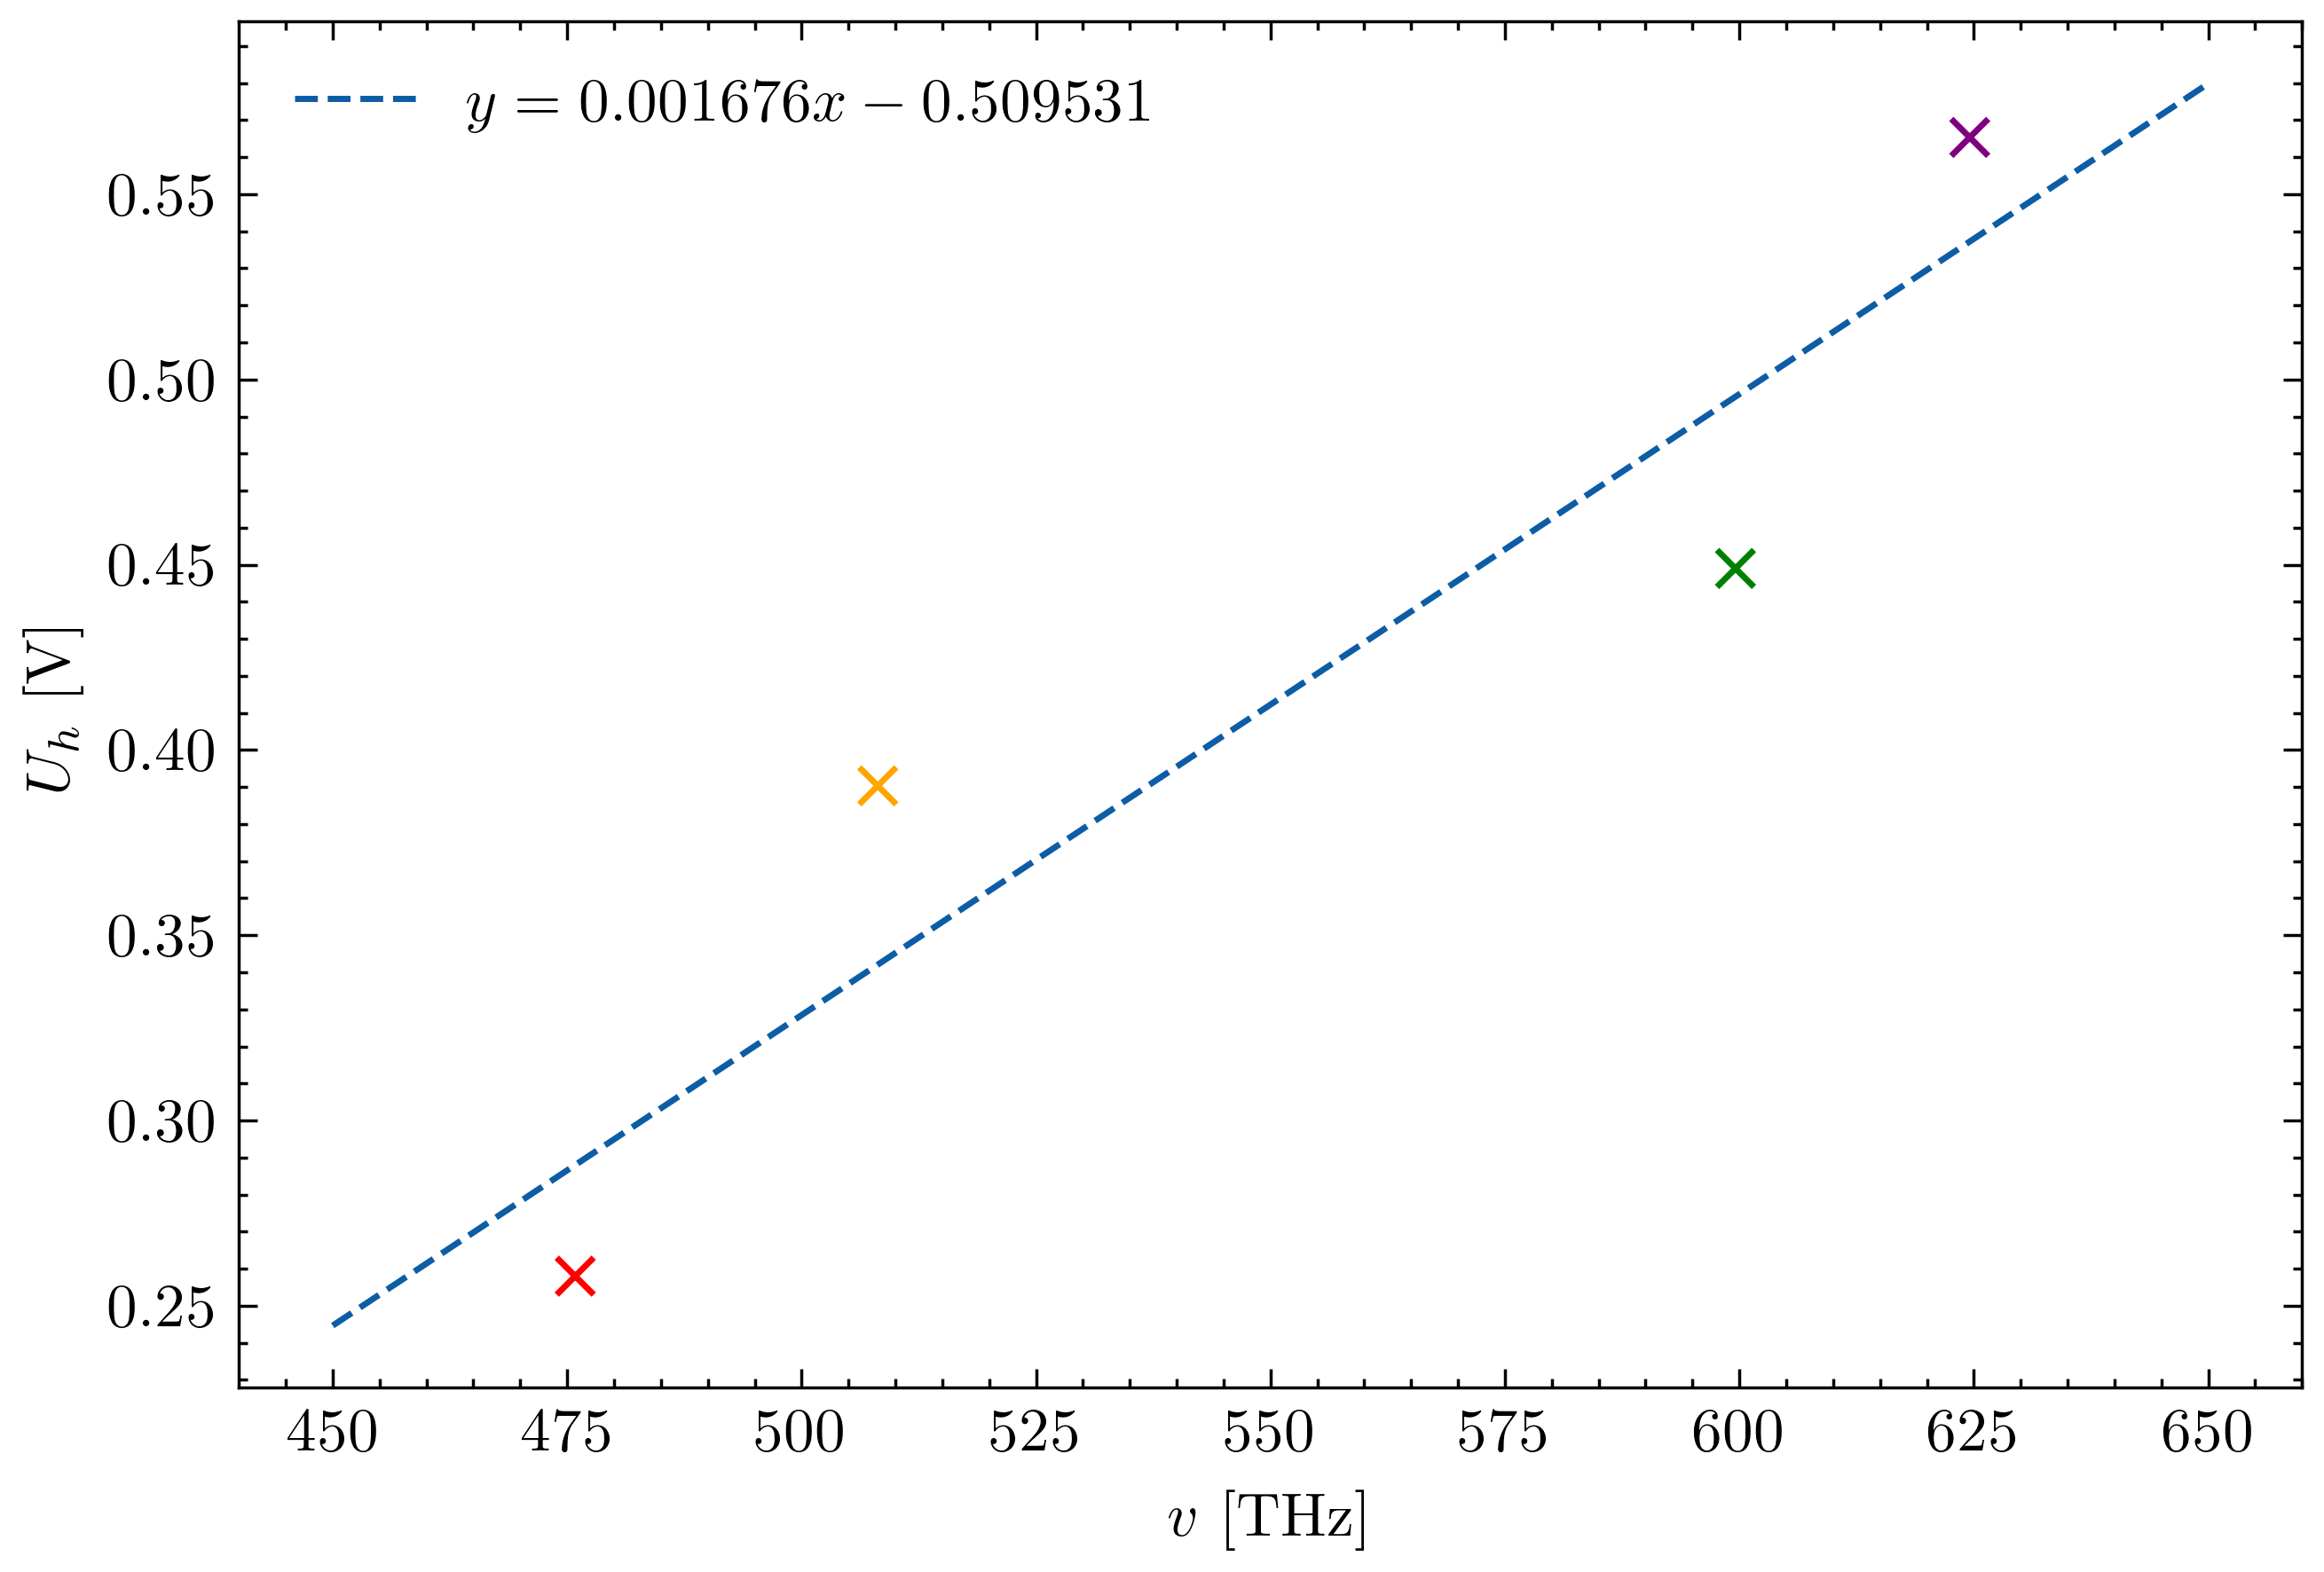

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=500)

x = np.linspace(450, 650, 30)
y = results.slope * x + results.intercept

ax.plot(x, y, linestyle='dashed', label=fr'$ y = {results.slope:.6f}x {results.intercept:+.6f}$')
ax.scatter(df['f [THa]'], df['Uh[V]'], c=['green','orange',  'purple', 'red'], marker='x')

ax.set_xlabel(fr"$v$ [THz]")
ax.set_ylabel(fr"$U_h$ [V]")
ax.legend()
fig.savefig('allColorsFreq.png')


$$ Uh= h/e * f - W/e $$

$$ h = a * e = 0,0016759 *10^{-12} * 1,6002 * 10^{-19} = $$

In [56]:
results.slope * 1.6002 

0.00303843870713125

In [15]:
results.stderr * 1.6002


0.0007195608921741621

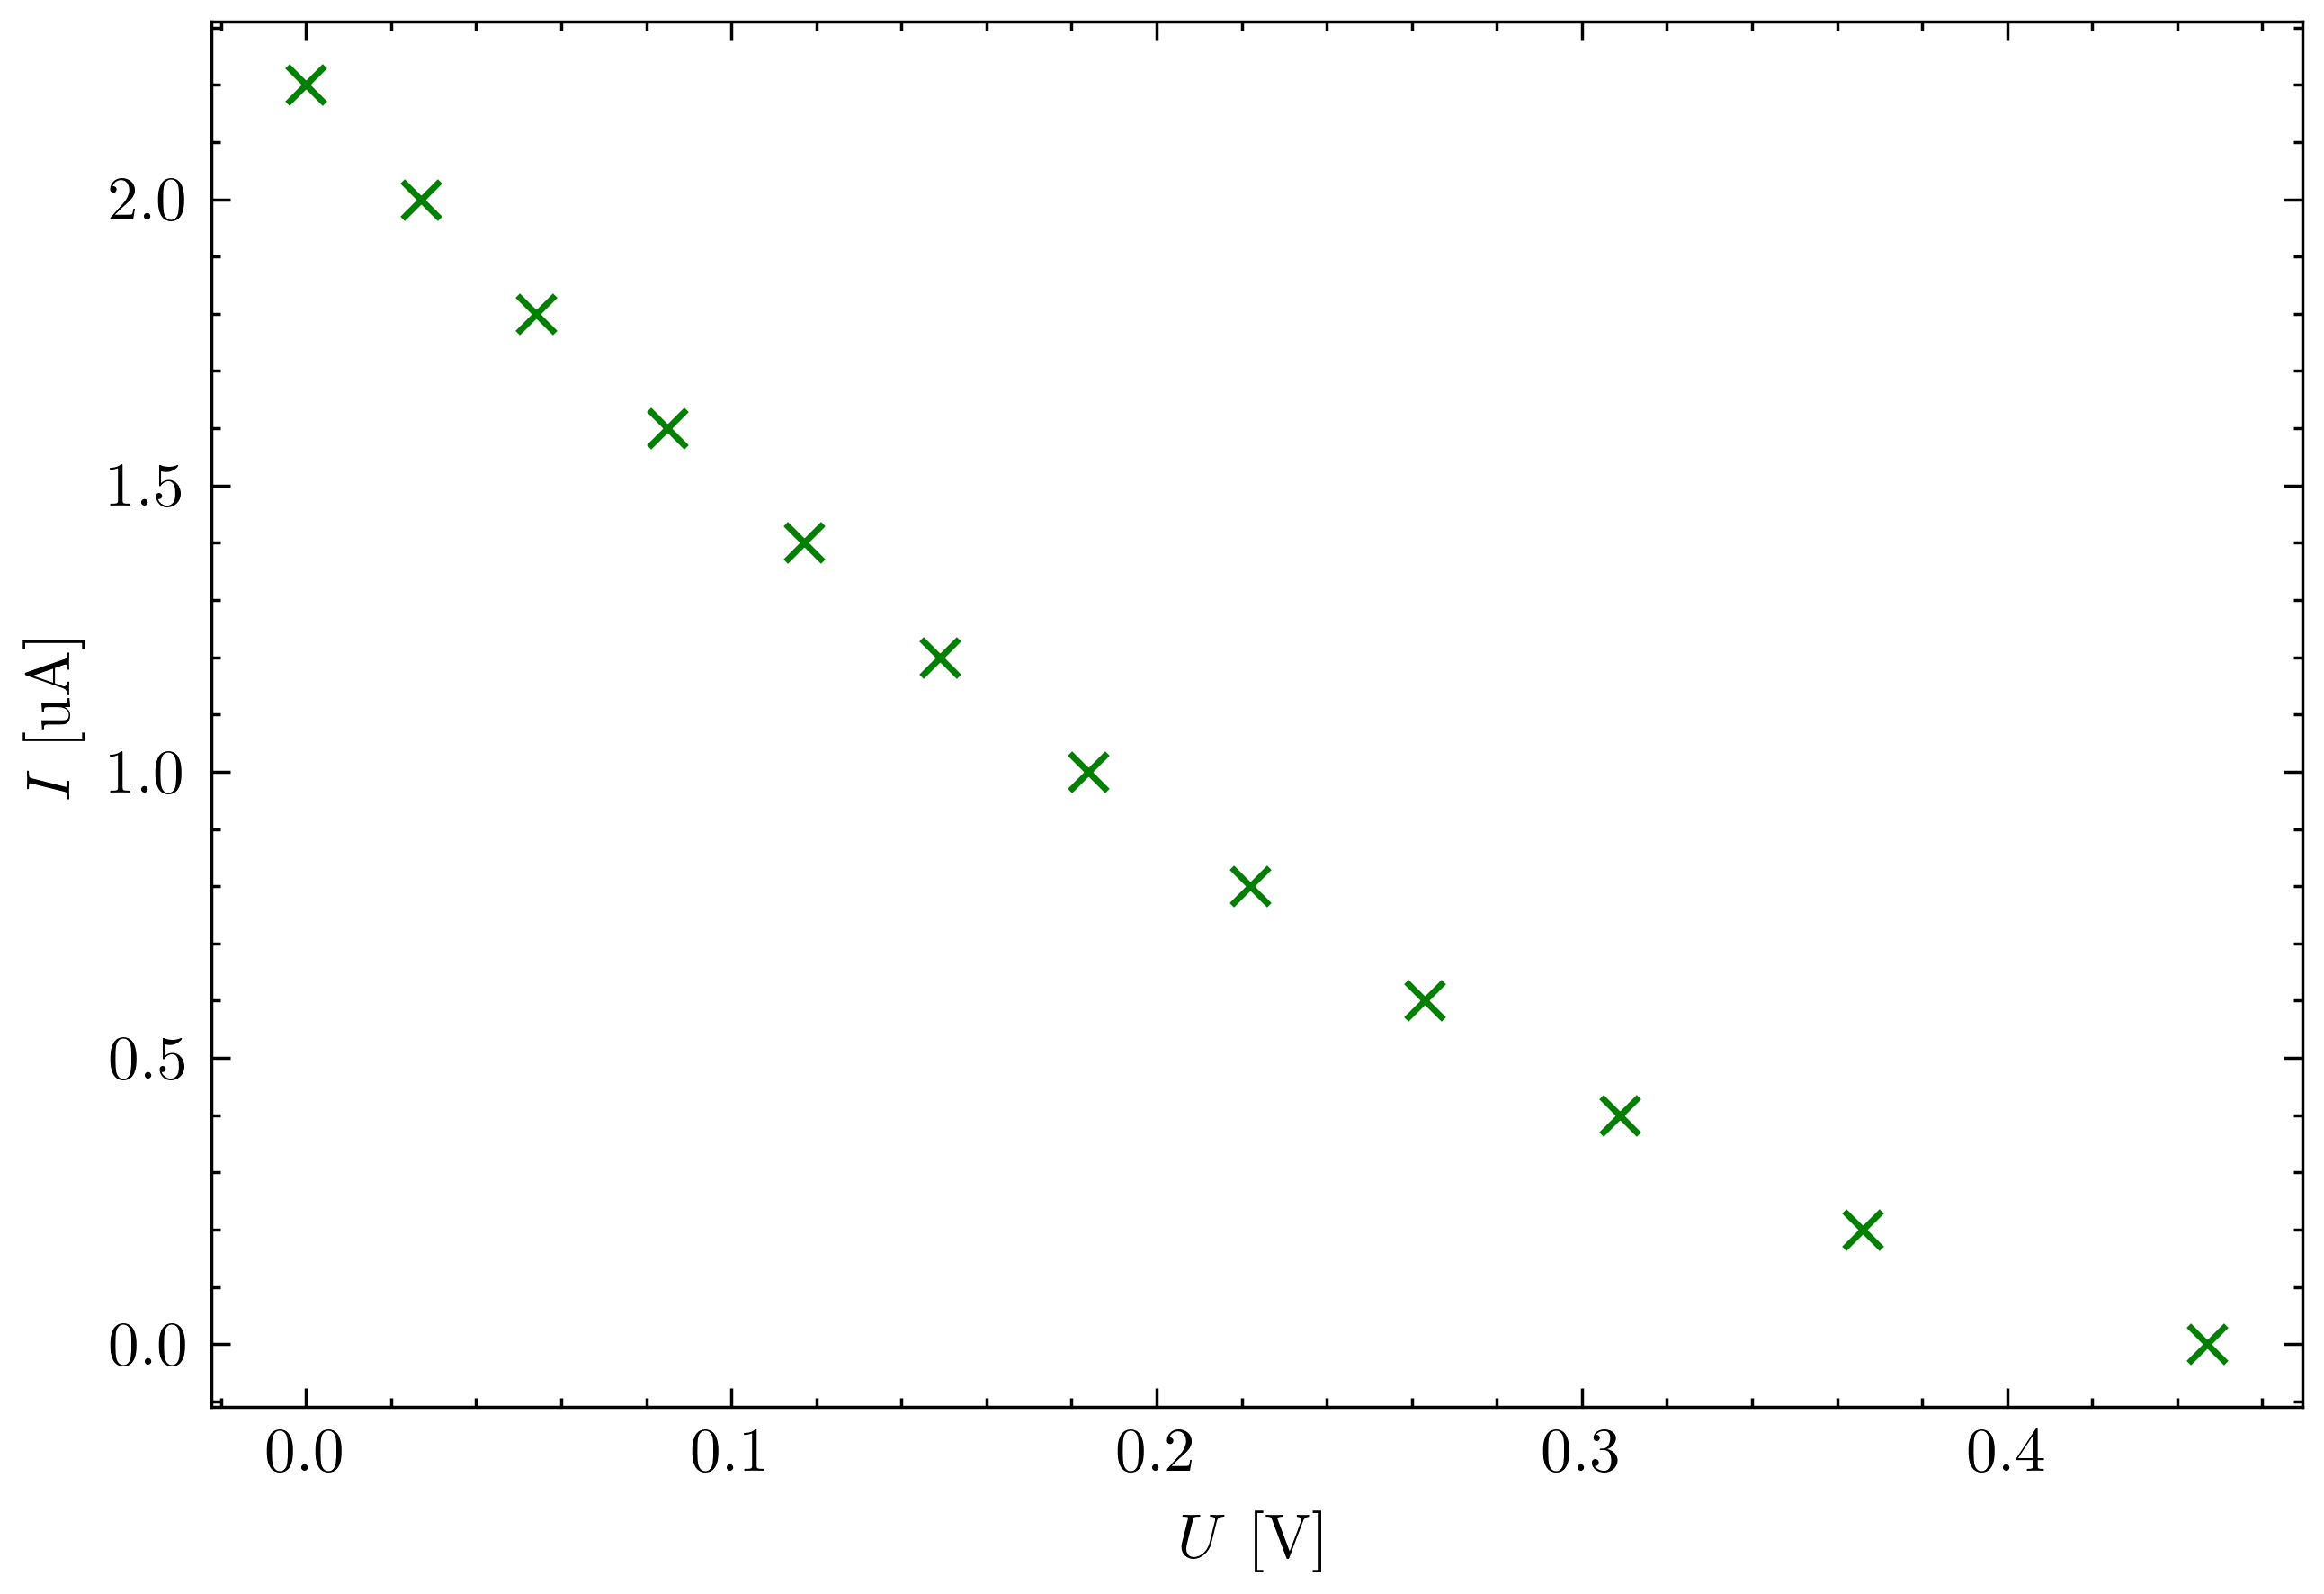

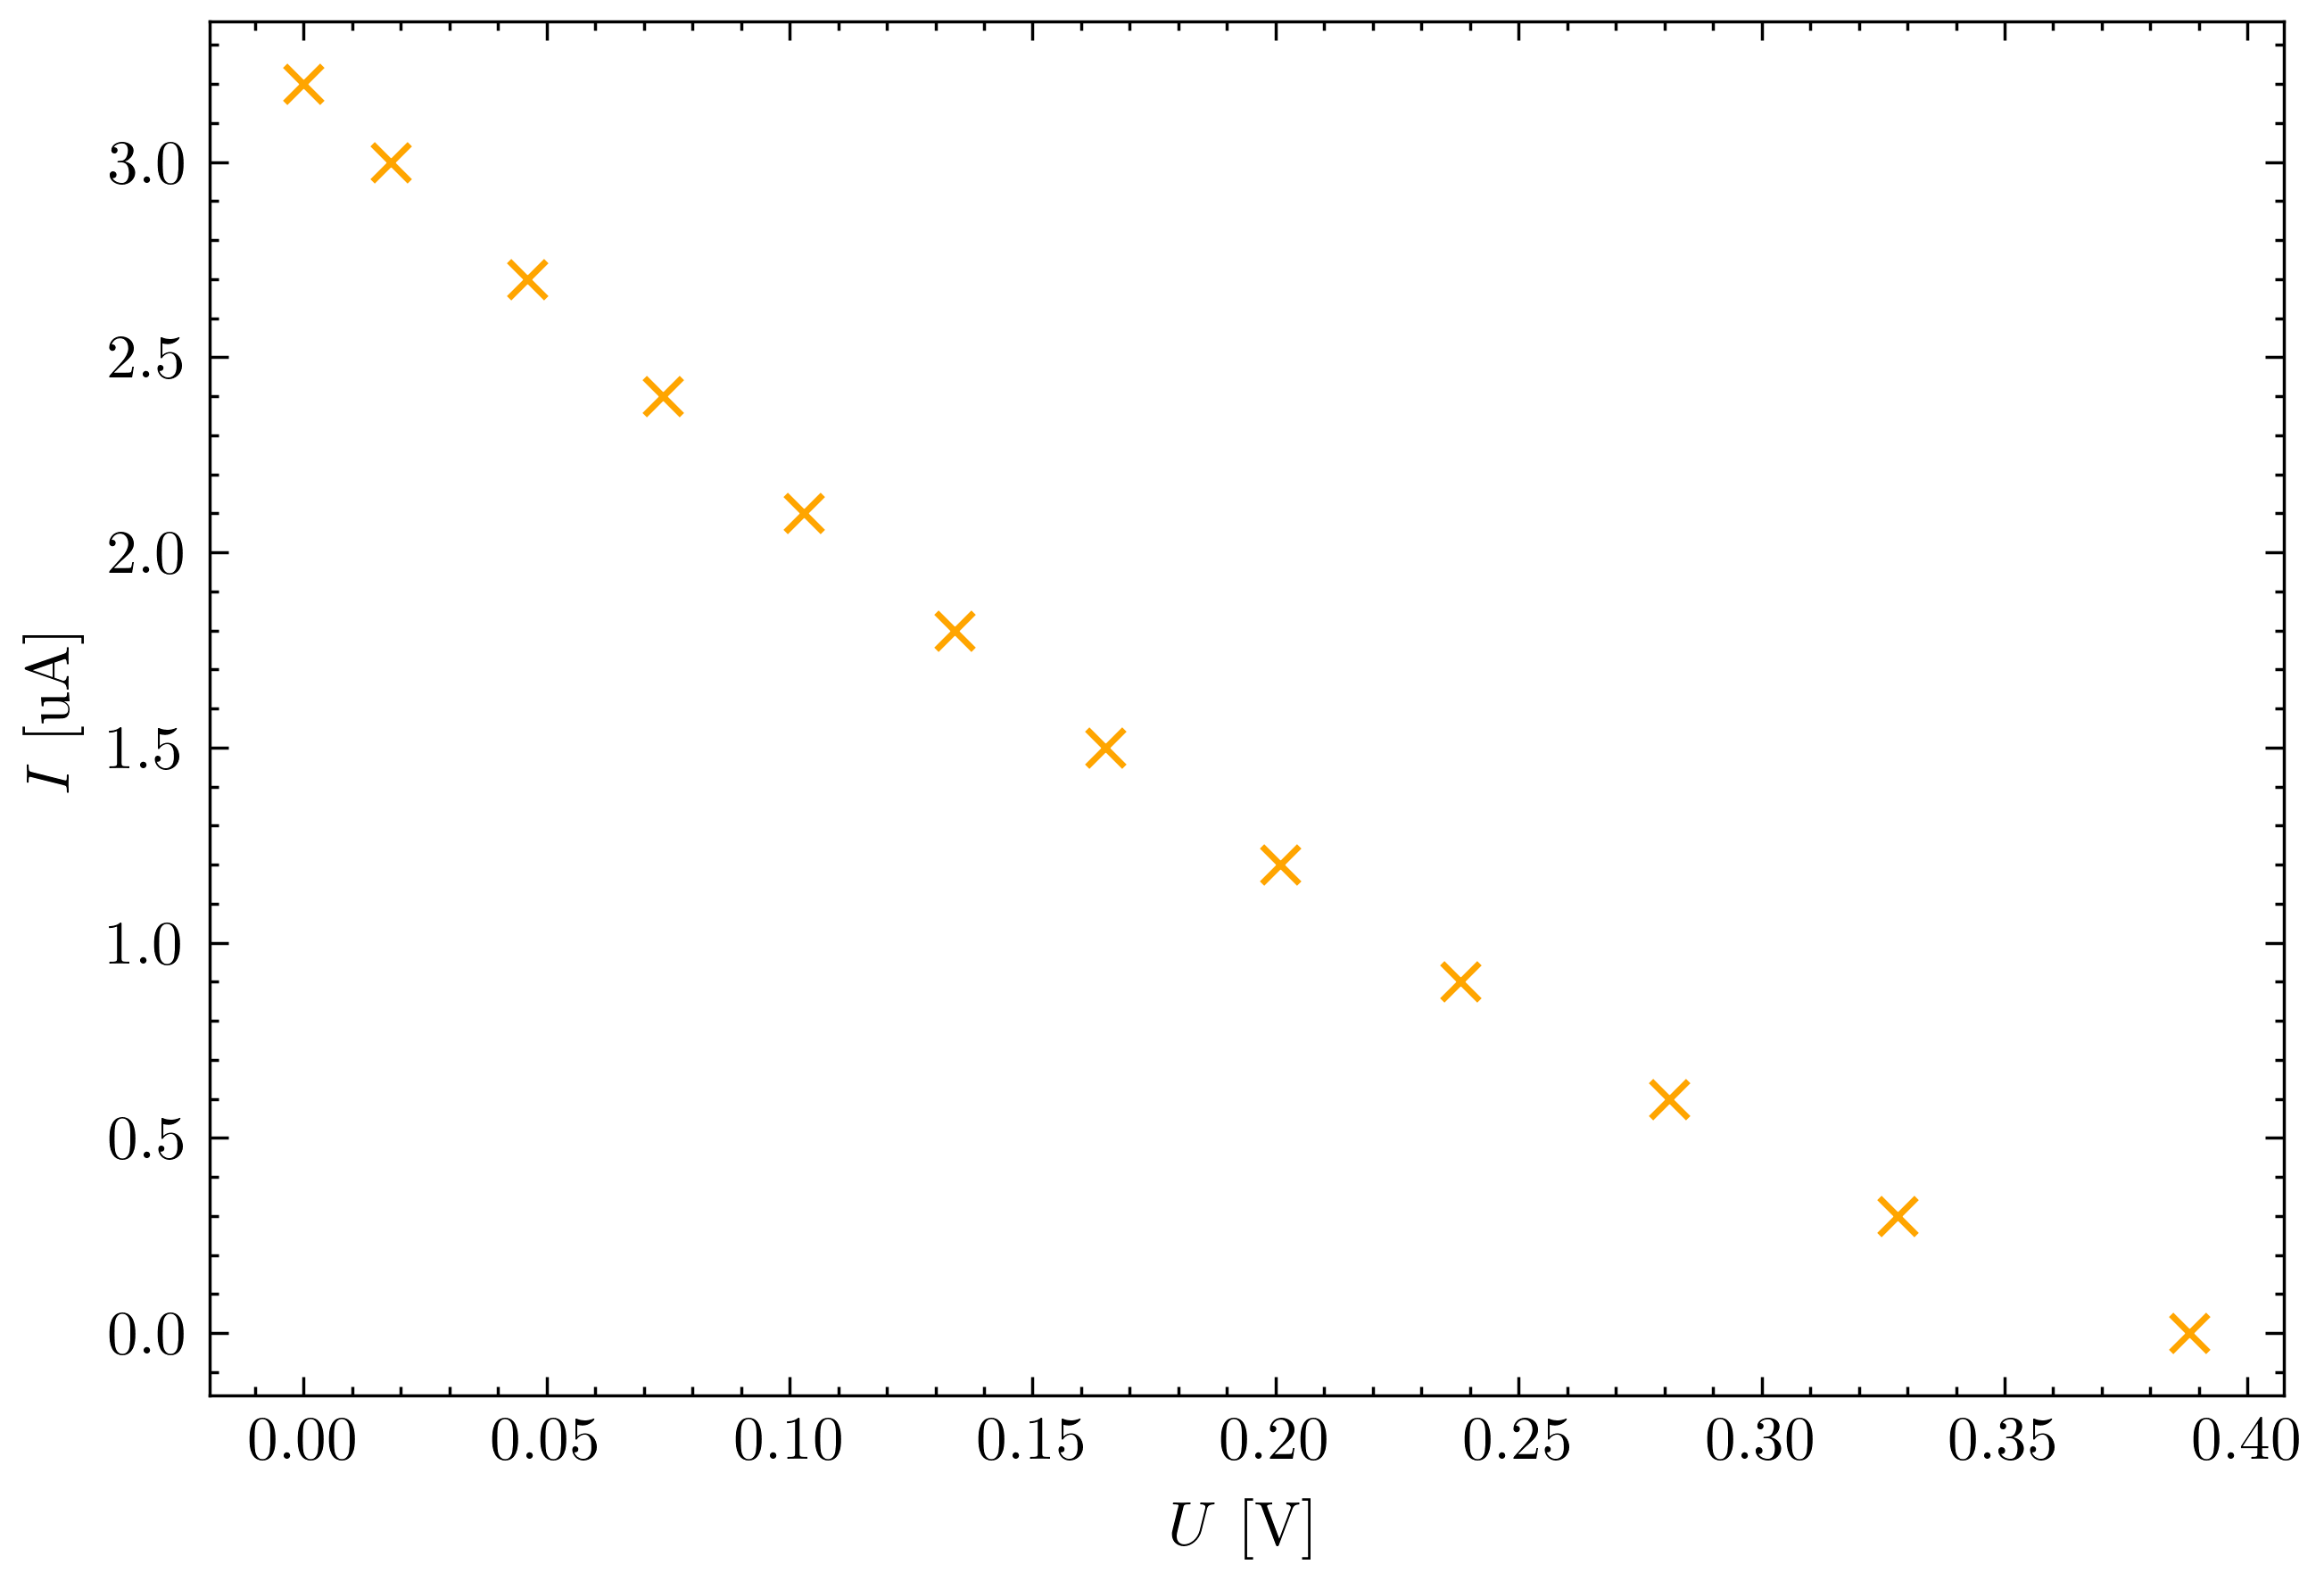

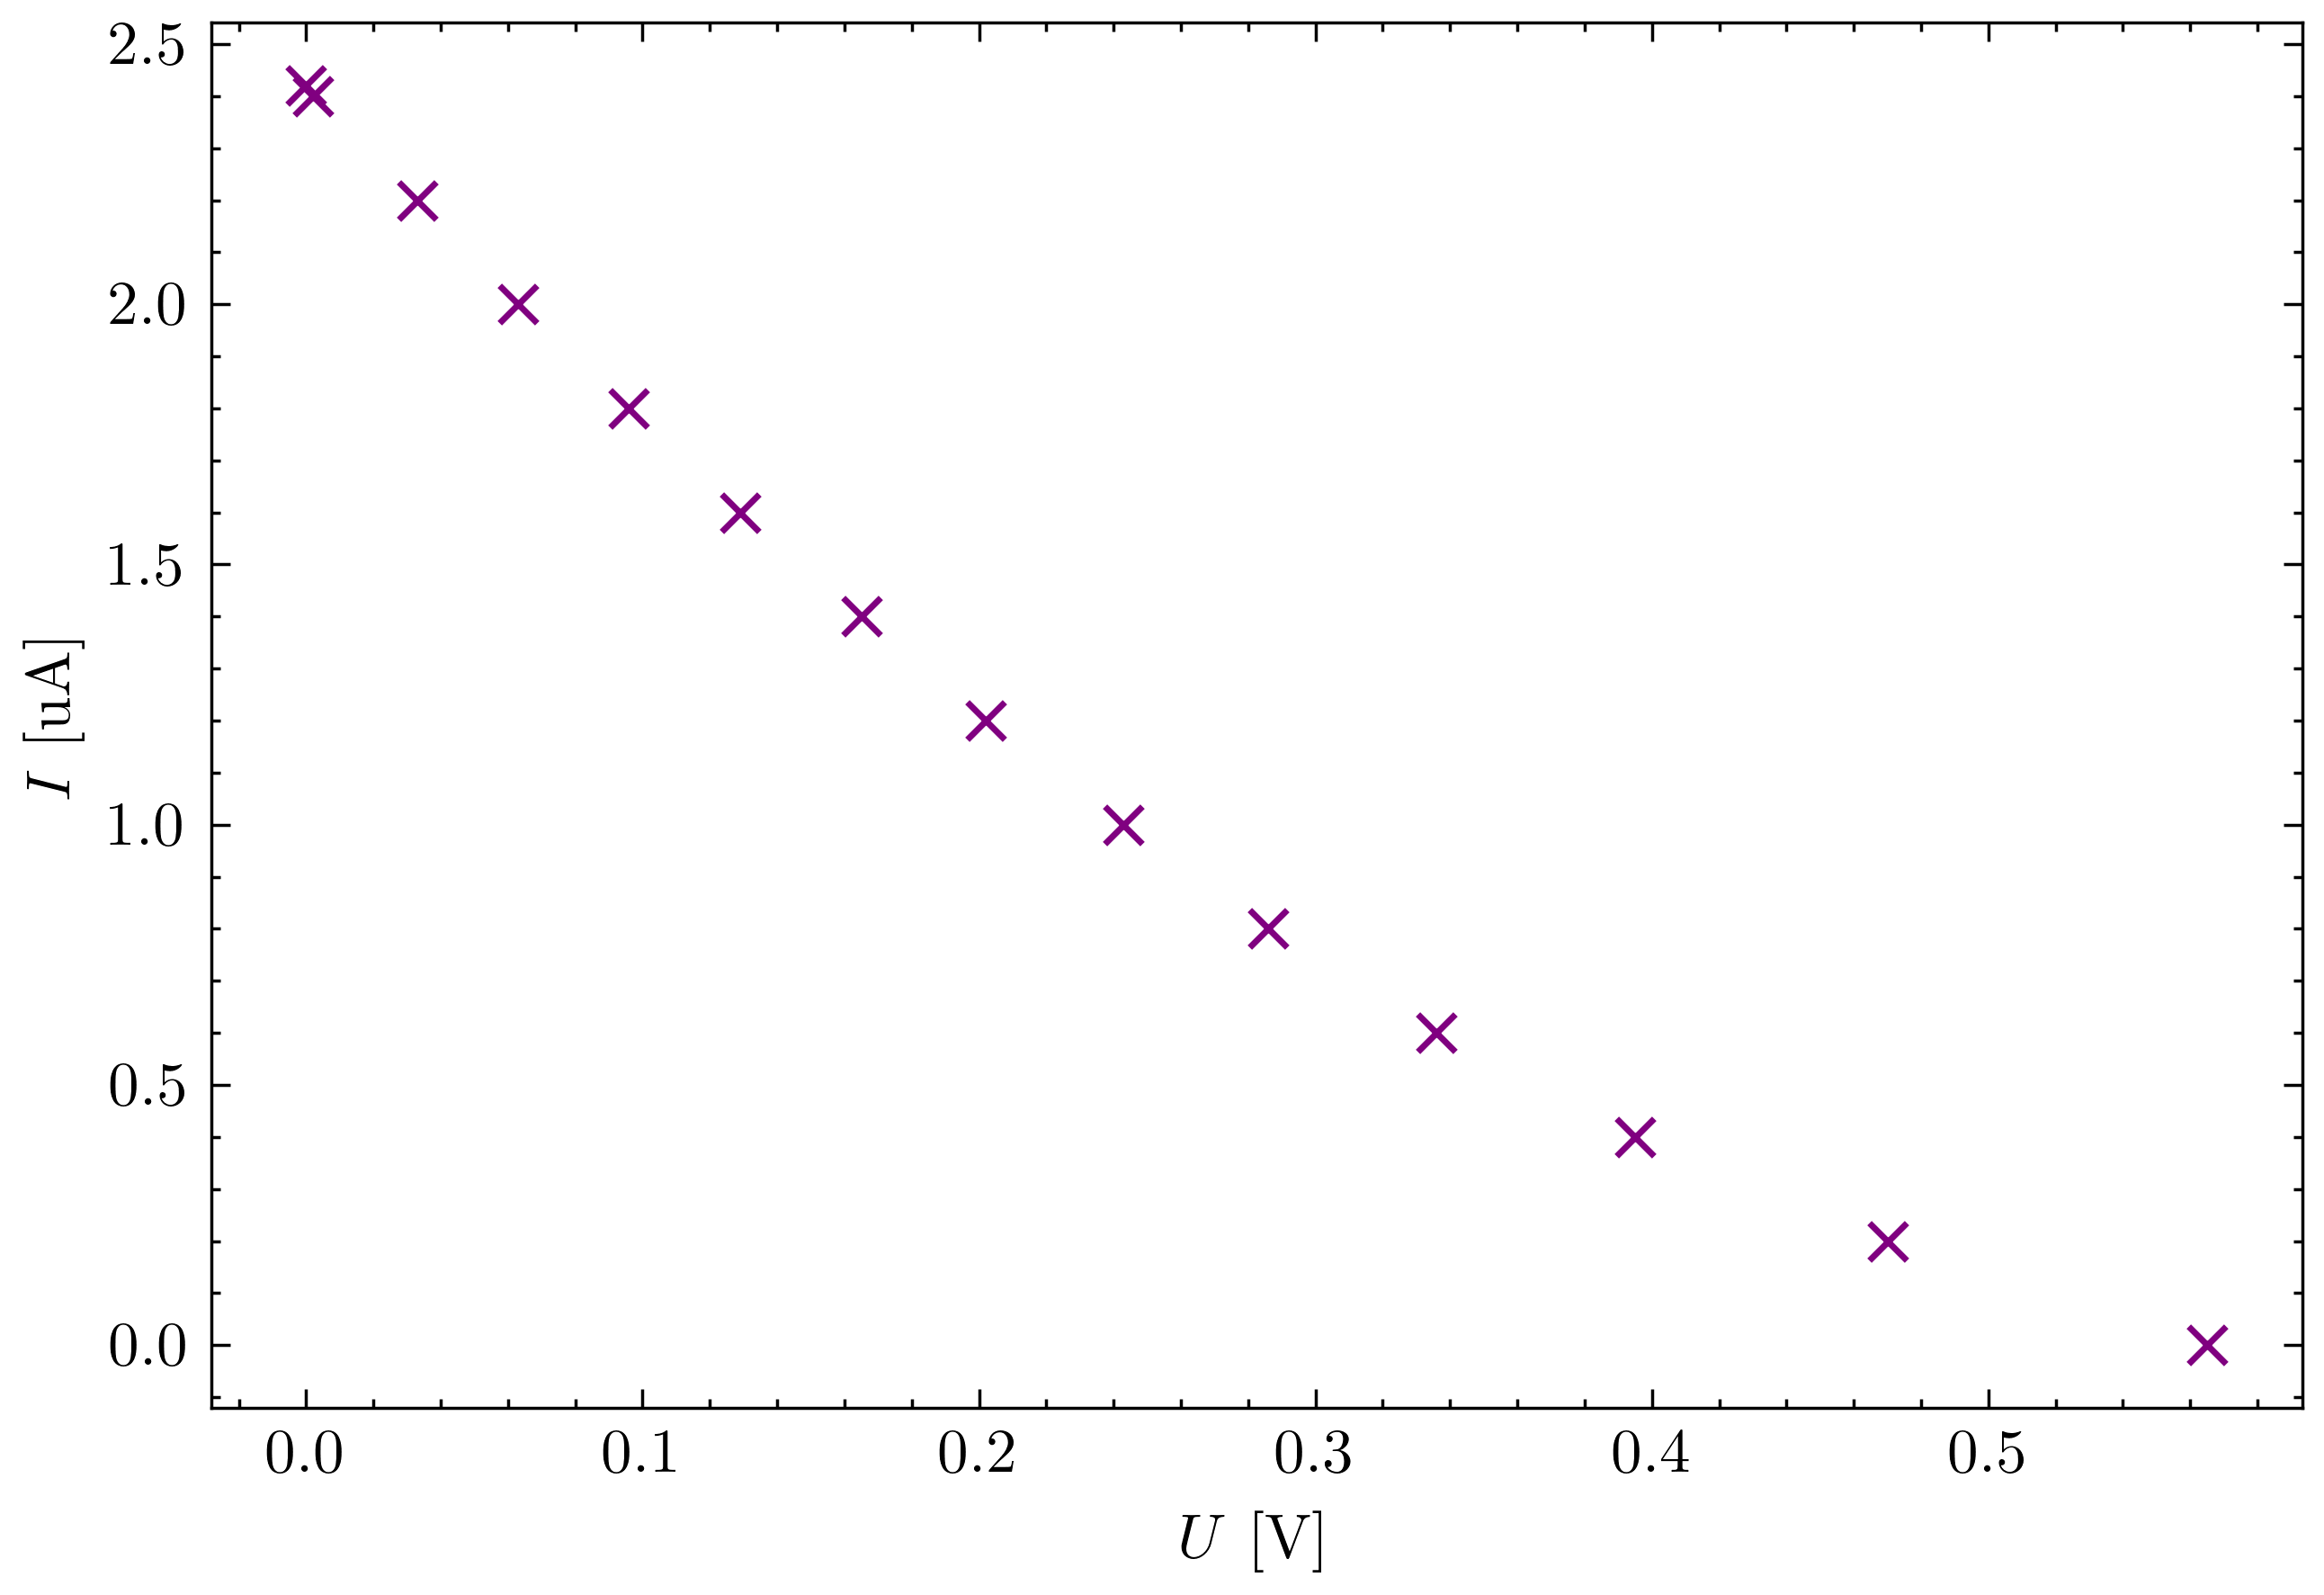

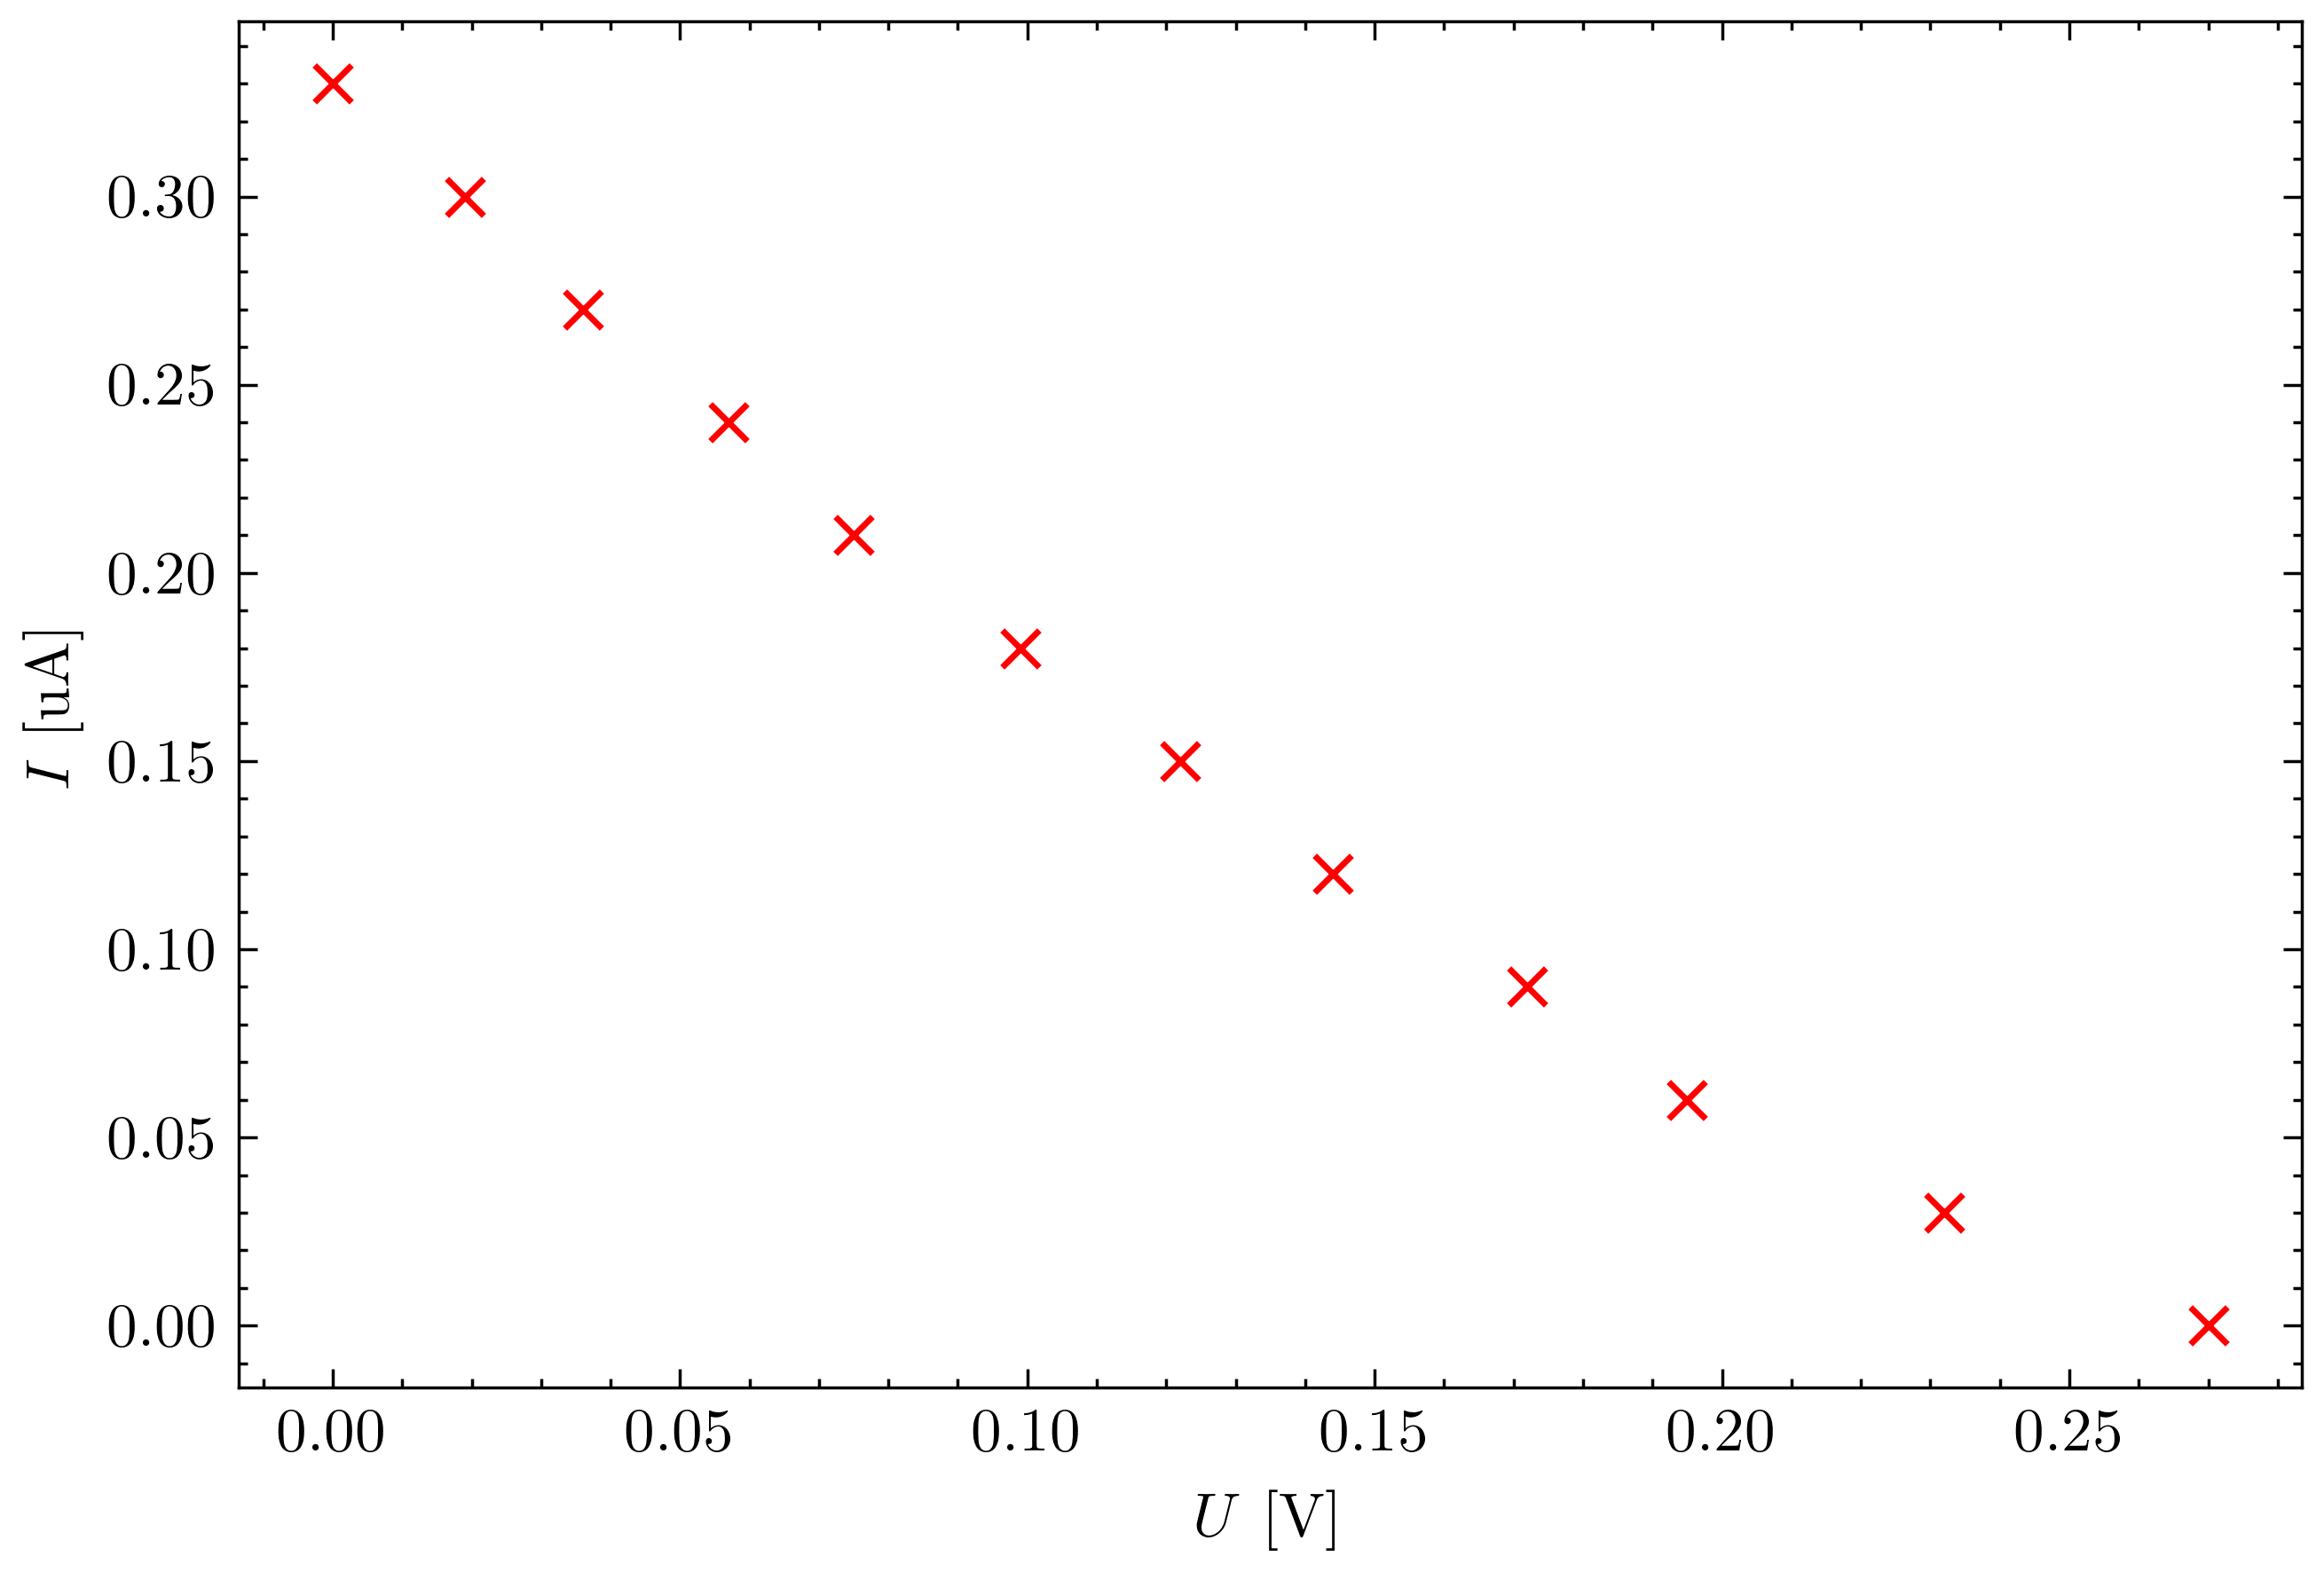

In [61]:
def save_color_fig(light, lightDf, color):
    fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=500)
    ax.scatter(lightDf['U [V]'], lightDf['I [uA]'], c=color, marker='x')
    ax.set_xlabel(fr"$U$ [V]")
    ax.set_ylabel(fr"$I$ [uA]")
    fig.savefig(f'{light}.png')

green = pd.read_csv('./green.csv')
yellow = pd.read_csv('./yellow.csv')
purple = pd.read_csv('./purple.csv')
red = pd.read_csv('./red.csv')

save_color_fig('green', green, 'green')
save_color_fig('yellow', yellow, 'orange')
save_color_fig('purple', purple, 'purple')
save_color_fig('red', red, 'red')

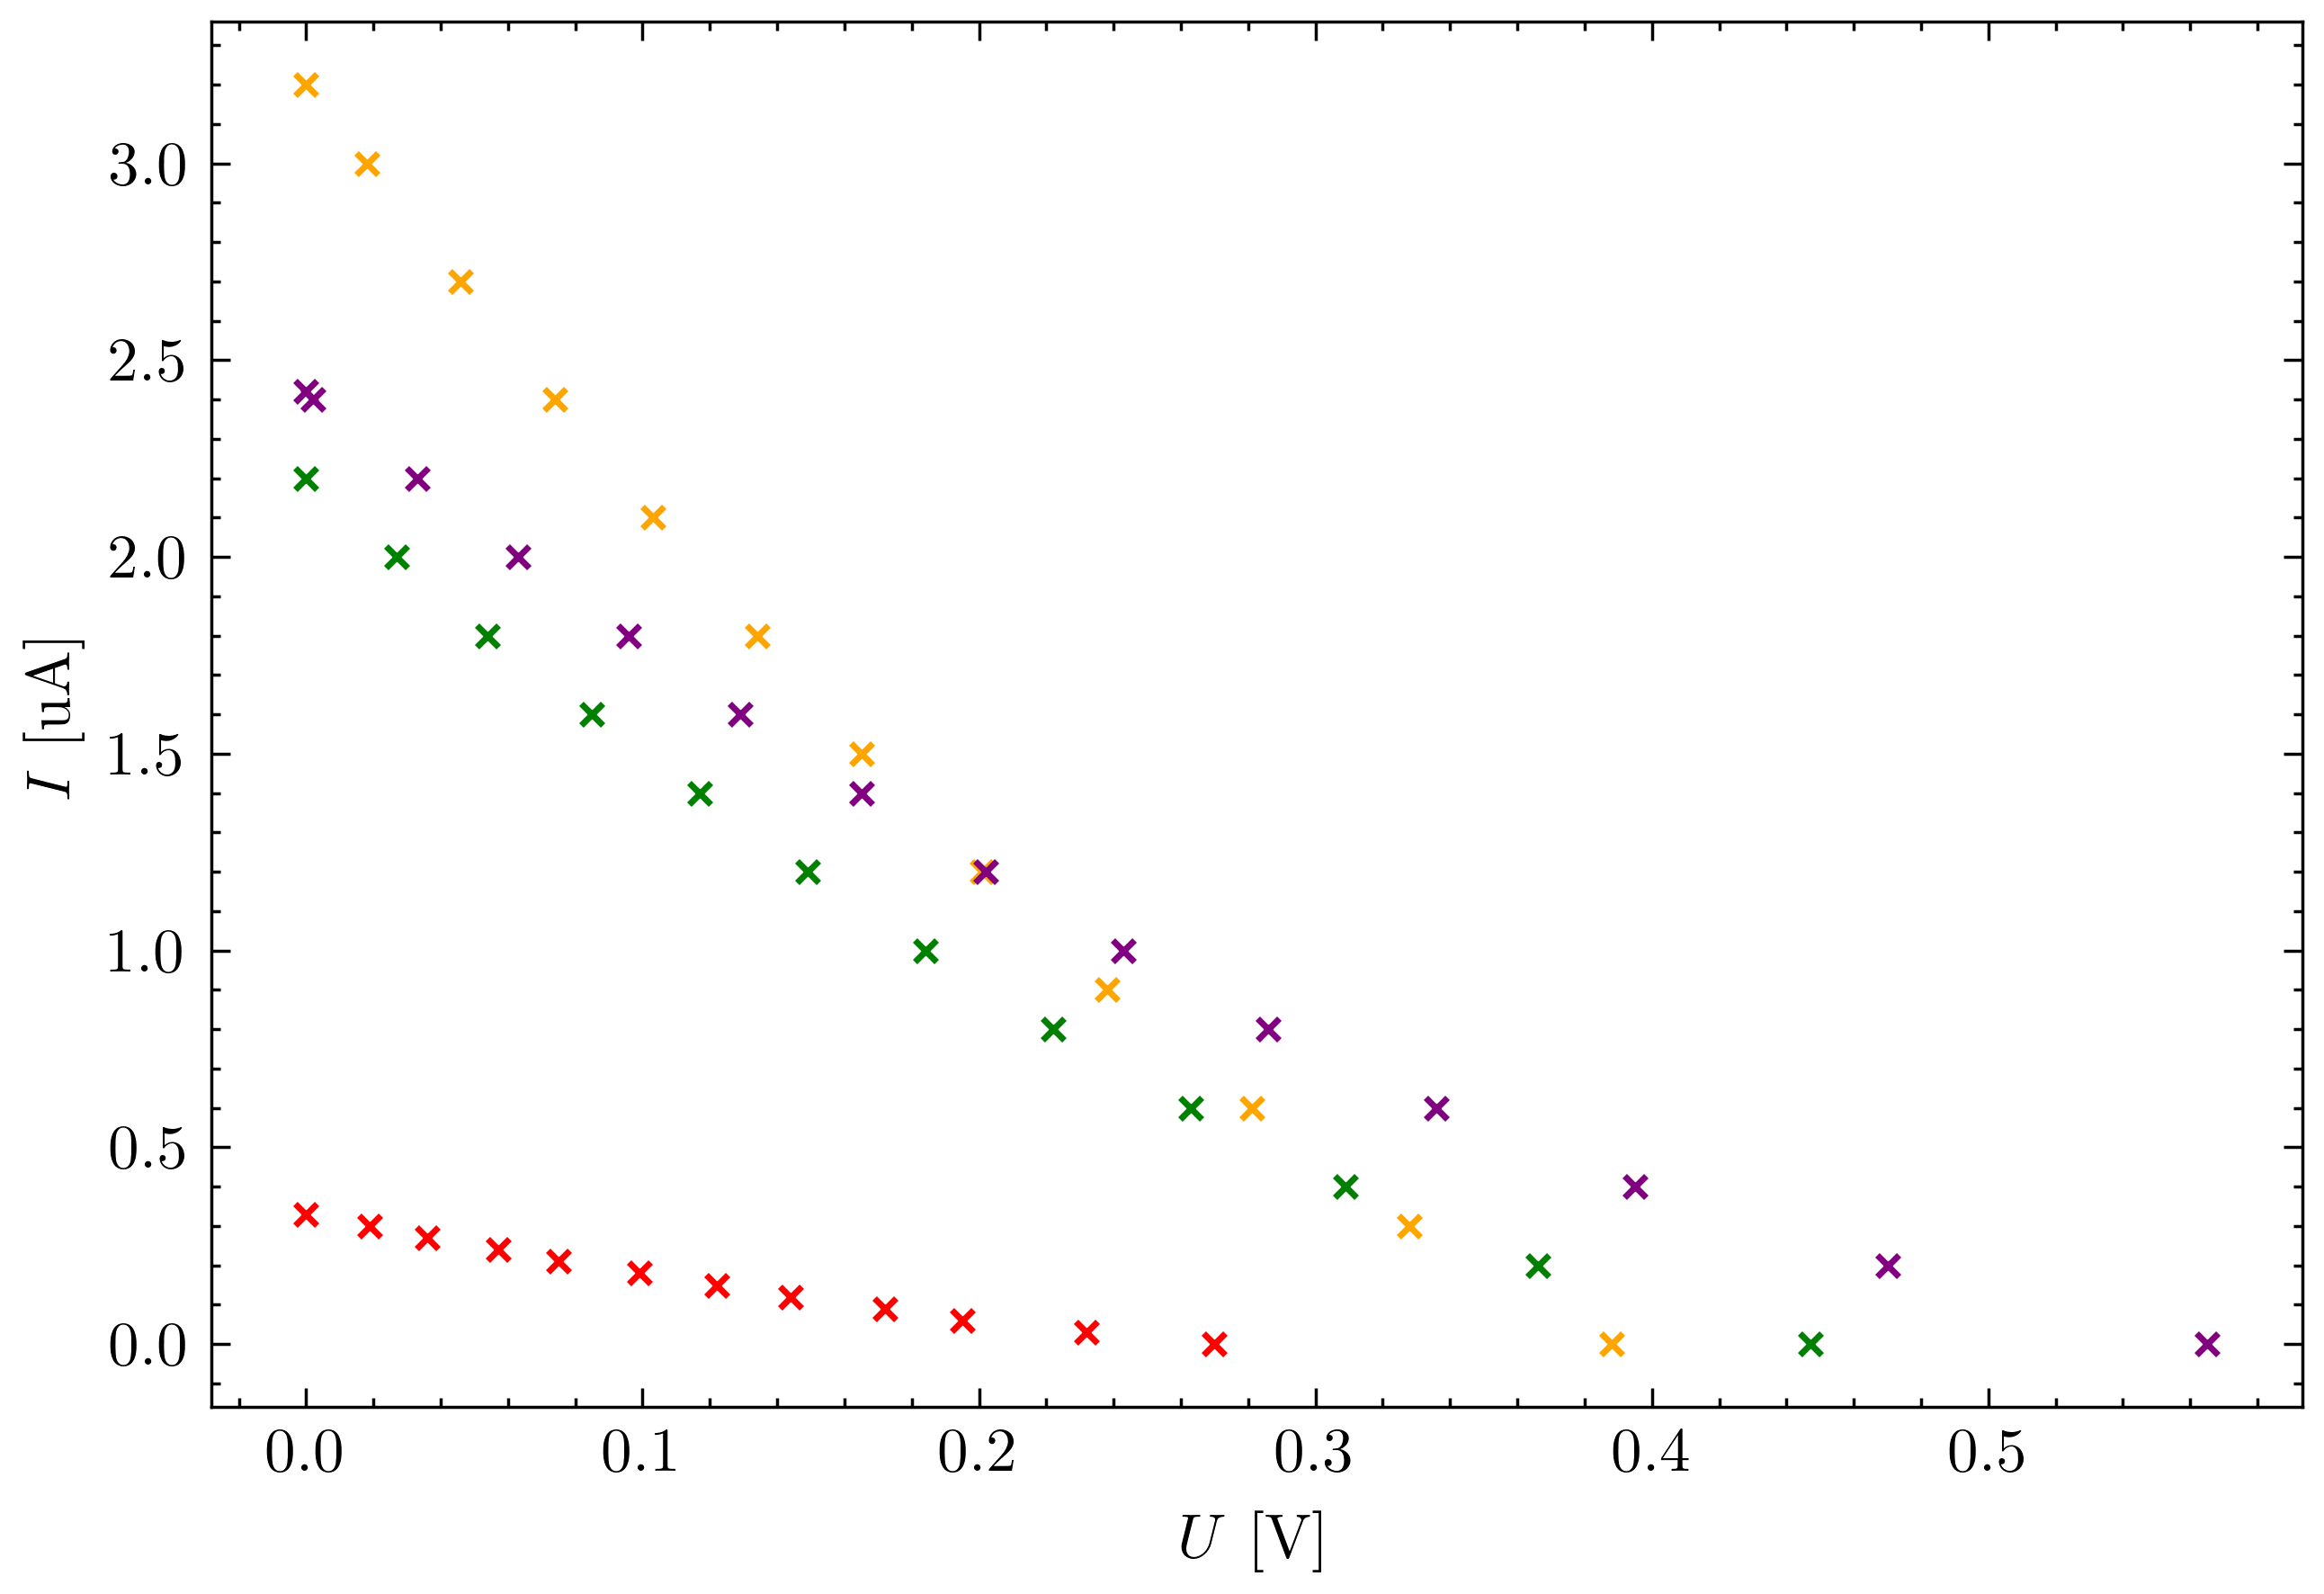

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=500)

ax.scatter(green['U [V]'], green['I [uA]'], 12, c='green', marker='x')
ax.scatter(yellow['U [V]'], yellow['I [uA]'],12,  c='orange', marker='x')
ax.scatter(purple['U [V]'], purple['I [uA]'], 12, c='purple', marker='x')
ax.scatter(red['U [V]'], red['I [uA]'], 12, c='red', marker='x')

ax.set_xlabel(fr"$U$ [V]")
ax.set_ylabel(fr"$I$ [uA]")
fig.savefig(f'allColors.png')